---
### Question 1: [Index] S&P 500 Stocks Added to the Index

**Which year had the highest number of additions?**

Using the list of S&P 500 companies from Wikipedia's [S&P 500 companies page](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies), download the data including the year each company was added to the index.
* Create a DataFrame with company tickers, names, and the year they were added.
* Extract the year from the addition date and calculate the number of stocks added each year.
* Which year had the highest number of additions (1957 doesn't count, as it was the year when the S&P 500 index was founded)? Write down this year as your answer (the most recent one, if you have several records).

*Context*: 
> "Following the announcement, all four new entrants saw their stock prices rise in extended trading on Friday" - recent examples of S&P 500 additions include DASH, WSM, EXE, TKO in 2025 ([Nasdaq article](https://www.nasdaq.com/articles/sp-500-reshuffle-dash-tko-expe-wsm-join-worth-buying)).

*Additional*: How many current S&P 500 stocks have been in the index for more than 20 years? When stocks are added to the S&P 500, they usually experience a price bump as investors and index funds buy shares following the announcement.

# ---

In [5]:
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

In [6]:
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tables = pd.read_html(url)
df = tables[0].copy()


final_df= df[['Symbol','Security','Founded','Date added']].copy()

# Convert 'Date added' to datetime, ignoring errors

final_df['Date added'] = pd.to_datetime(final_df['Date added'], errors='coerce')

# Drop NaT (missing values in Date added)
final_df = final_df.dropna(subset=['Date added'])

# Extract year from 'Date added'
final_df['Year added'] = final_df['Date added'].dt.year

# Count number of additions per year
additions_per_year = final_df['Year added'].value_counts().sort_index()

# Exclude 1957
additions_filtered = additions_per_year[additions_per_year.index != 1957]

# Find the year with the highest number of additions (most recent if tie)
max_additions = additions_filtered.max()
most_recent_max_year = additions_filtered[additions_filtered == max_additions].index.max()

print(f"Year with the most additions to S&P 500 (excluding 1957): {most_recent_max_year}")

Year with the most additions to S&P 500 (excluding 1957): 2017


In [7]:
from datetime import datetime

current_year = datetime.now().year
current_year

final_df['Founded'] = pd.to_numeric(final_df['Founded'], errors='coerce')

final_df['Years_in_Index'] = current_year - final_df['Founded']

over_20_years = final_df[final_df['Years_in_Index'] > 20]
print(f"Stocks in S&P 500 for more than 20 years: {len(over_20_years)}")

Stocks in S&P 500 for more than 20 years: 427


### Question 2. [Macro] Indexes YTD (as of 1 May 2025)

**How many indexes (out of 10) have better year-to-date returns than the US (S&P 500) as of May 1, 2025?**

Using Yahoo Finance World Indices data, compare the year-to-date (YTD) performance (1 January-1 May 2025) of major stock market indexes for the following countries:
* United States - S&P 500 (^GSPC)
* China - Shanghai Composite (000001.SS)
* Hong Kong - HANG SENG INDEX (^HSI)	
* Australia - S&P/ASX 200 (^AXJO)
* India - Nifty 50 (^NSEI)
* Canada - S&P/TSX Composite (^GSPTSE)
* Germany - DAX (^GDAXI)
* United Kingdom - FTSE 100 (^FTSE)
* Japan - Nikkei 225 (^N225)
* Mexico - IPC Mexico (^MXX)
* Brazil - Ibovespa (^BVSP)

*Hint*: use start_date='2025-01-01' and end_date='2025-05-01' when downloading daily data in yfinance

Context: 
> [Global Valuations: Who's Cheap, Who's Not?](https://simplywall.st/article/beyond-the-us-global-markets-after-yet-another-tariff-update) article suggests "Other regions may be growing faster than the US and you need to diversify."

Reference: Yahoo Finance World Indices - https://finance.yahoo.com/world-indices/

*Additional*: How many of these indexes have better returns than the S&P 500 over 3, 5, and 10 year periods? Do you see the same trend?
Note: For simplicity, ignore currency conversion effects.)

---

In [8]:
# end = date.today()
# print(f'Year = {end.year}; month= {end.month}; day={end.day}')

# start = date(year=end.year-10, month=end.month, day=end.day)
# print(f'Period for indexes: {start} to {end} ')

start = date(year=2025, month=1, day=1)

end = date(year=2025, month=5, day=1)
print(f'Period for indexes: {start} to {end}')



Period for indexes: 2025-01-01 to 2025-05-01


In [9]:
ticker_obj = yf.Ticker("^GSPC")

sandp500_daily = ticker_obj.history(start = start,end =end,interval = "1d")
sandp500_daily.shape

(81, 7)

In [10]:
import yfinance as yf
import pandas as pd

class GetTickerData:
    def __init__(self, tickers):
        # Accept either a string (single ticker) or a list of tickers
        if isinstance(tickers, str):
            self.tickers = [tickers]
        else:
            self.tickers = tickers
        self.data = {}

    def get_data(self, start, end, combine=False):
        """
        Download historical data for all tickers between start and end dates.

        Parameters:
        - start (str): Start date (e.g., '2023-01-01')
        - end (str): End date (e.g., '2023-12-31')
        - combine (bool): Whether to return a single combined DataFrame

        Returns:
        - dict: {ticker: DataFrame} if combine=False
        - DataFrame: multi-index DataFrame if combine=True
        """
        for ticker in self.tickers:
            data = yf.Ticker(ticker).history(start=start, end=end, interval="1d")
            self.data[ticker] = data

        if combine:
            combined_df = pd.concat(self.data.values(), keys=self.data.keys(), names=["Ticker", "Date"])
            combined_df = combined_df.reset_index()
            return combined_df
        return self.data


In [11]:
tickers = ["^GSPC","000001.SS","^HSI","^AXJO","^NSEI","^GSPTSE","^GDAXI","^FTSE","^N225","^MXX","^BVSP"]
data_fetcher = GetTickerData(tickers)
all_data = data_fetcher.get_data(start=start, end=end, combine=True)

all_data.head()


,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,^GSPC,2025-01-02 00:00:00-05:00,5903.259766,5935.089844,5829.529785,5868.549805,3621680000,0.0,0.0
1,^GSPC,2025-01-03 00:00:00-05:00,5891.069824,5949.339844,5888.660156,5942.470215,3667340000,0.0,0.0
2,^GSPC,2025-01-06 00:00:00-05:00,5982.810059,6021.040039,5960.009766,5975.379883,4940120000,0.0,0.0
3,^GSPC,2025-01-07 00:00:00-05:00,5993.259766,6000.680176,5890.680176,5909.029785,4517330000,0.0,0.0
4,^GSPC,2025-01-08 00:00:00-05:00,5910.660156,5927.890137,5874.779785,5918.250000,4441740000,0.0,0.0


In [12]:
def add_growth_metrics(df):
    """
    Adds Day-over-Day (DoD), Quarter-over-Quarter (QoQ), Year-over-Year (YoY), and Year-to-Date (YTD) growth
    using the 'Date' column for year reference.
    
    Assumes 'Date' column exists and is datetime type.
    """
    df = df.copy()

    # Ensure 'Date' column is datetime
    df['Date'] = pd.to_datetime(df['Date'], utc=True)

    # Sort by Date in case it's not sorted
    df = df.sort_values('Date')

    # Day-over-Day % change
    df['DoD_Growth'] = df['Close'].pct_change()

    # QoQ and YoY growth by trading days
    df['QoQ_Growth'] = df['Close'].pct_change(periods=63)
    df['YoY_Growth'] = df['Close'].pct_change(periods=252)

    # YTD growth based on first trading day of the year
    df['Year'] = df['Date'].dt.year
    df['YTD_Base'] = df.groupby('Year')['Close'].transform('first')
    df['YTD_Growth'] = (df['Close'] / df['YTD_Base']) - 1

    # Clean up
    df.drop(columns=['YTD_Base'], inplace=True)

    df.reset_index(drop=True, inplace=True)

    return df


In [13]:
final_df_growth = add_growth_metrics(all_data)
final_df_growth.head()

,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,DoD_Growth,QoQ_Growth,YoY_Growth,Year,YTD_Growth
0,^NSEI,2024-12-31 18:30:00+00:00,23637.650391,23822.800781,23562.800781,23742.900391,154900,0.0,0.0,NaN,NaN,NaN,2024,0.000000
1,^AXJO,2025-01-01 13:00:00+00:00,8159.100098,8204.200195,8146.600098,8201.200195,304400,0.0,0.0,-0.654583,NaN,NaN,2025,0.000000
2,^HSI,2025-01-01 16:00:00+00:00,19932.800781,19932.800781,19542.980469,19623.320312,4033400000,0.0,0.0,1.392738,NaN,NaN,2025,1.392738
3,000001.SS,2025-01-01 16:00:00+00:00,3347.938965,3351.721924,3242.086914,3262.561035,561400,0.0,0.0,-0.833741,NaN,NaN,2025,-0.602185
4,^NSEI,2025-01-01 18:30:00+00:00,23783.000000,24226.699219,23751.550781,24188.650391,283200,0.0,0.0,6.414007,NaN,NaN,2025,1.949404


In [14]:
latest_ytd = (
    final_df_growth.sort_values('Date')                # ensure dates are sorted
    .groupby('Ticker', as_index=False)                 # group by Ticker
    .tail(1)                                            # get the latest row per Ticker
    .sort_values('YTD_Growth', ascending=False)        # sort by YTD growth
)

latest_ytd[['Ticker', 'Date', 'YTD_Growth']]  # show top 10


,Ticker,Date,YTD_Growth
884,^BVSP,2025-04-30 03:00:00+00:00,15.469175
887,^MXX,2025-04-30 06:00:00+00:00,5.859884
878,^N225,2025-04-29 15:00:00+00:00,3.395135
886,^GSPTSE,2025-04-30 04:00:00+00:00,2.029032
881,^NSEI,2025-04-29 18:30:00+00:00,1.967151
882,^GDAXI,2025-04-29 22:00:00+00:00,1.743133
880,^HSI,2025-04-29 16:00:00+00:00,1.697094
883,^FTSE,2025-04-29 23:00:00+00:00,0.035812
877,^AXJO,2025-04-29 14:00:00+00:00,-0.009145
885,^GSPC,2025-04-30 04:00:00+00:00,-0.320946


In [15]:
final_df_growth.groupby('Ticker').size()

Ticker
000001.SS    78
^AXJO        81
^BVSP        81
^FTSE        83
^GDAXI       83
^GSPC        81
^GSPTSE      83
^HSI         79
^MXX         81
^N225        78
^NSEI        80
dtype: int64

### Question 3. [Index] S&P 500 Market Corrections Analysis


**Calculate the median duration (in days) of significant market corrections in the S&P 500 index.**

For this task, define a correction as an event when a stock index goes down by **more than 5%** from the closest all-time high maximum.

Steps:
1. Download S&P 500 historical data (1950-present) using yfinance
2. Identify all-time high points (where price exceeds all previous prices)
3. For each pair of consecutive all-time highs, find the minimum price in between
4. Calculate drawdown percentages: (high - low) / high × 100
5. Filter for corrections with at least 5% drawdown
6. Calculate the duration in days for each correction period
7. Determine the 25th, 50th (median), and 75th percentiles for correction durations

*Context:* 
> * Investors often wonder about the typical length of market corrections when deciding "when to buy the dip" ([Reddit discussion](https://www.reddit.com/r/investing/comments/1jrqnte/when_are_you_buying_the_dip/?rdt=64135)).

> * [A Wealth of Common Sense - How Often Should You Expect a Stock Market Correction?](https://awealthofcommonsense.com/2022/01/how-often-should-you-expect-a-stock-market-correction/)

*Hint (use this data to compare with your results)*: Here is the list of top 10 largest corrections by drawdown:
* 2007-10-09 to 2009-03-09: 56.8% drawdown over 517 days
* 2000-03-24 to 2002-10-09: 49.1% drawdown over 929 days
* 1973-01-11 to 1974-10-03: 48.2% drawdown over 630 days
* 1968-11-29 to 1970-05-26: 36.1% drawdown over 543 days
* 2020-02-19 to 2020-03-23: 33.9% drawdown over 33 days
* 1987-08-25 to 1987-12-04: 33.5% drawdown over 101 days
* 1961-12-12 to 1962-06-26: 28.0% drawdown over 196 days
* 1980-11-28 to 1982-08-12: 27.1% drawdown over 622 days
* 2022-01-03 to 2022-10-12: 25.4% drawdown over 282 days
* 1966-02-09 to 1966-10-07: 22.2% drawdown over 240 days

---


In [16]:
sandp_ticker = "^GSPC"

start = date(year=1950, month=1, day=1)
end = date(year=2025, month=5, day=1)

data_fetcher = GetTickerData(sandp_ticker)
sandpdata = data_fetcher.get_data(start=start, end=end, combine=True)

print(sandpdata.shape)
sandpdata.head()

(18952, 9)


,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,^GSPC,1950-01-03 00:00:00-05:00,16.66,16.66,16.66,16.66,1260000,0.0,0.0
1,^GSPC,1950-01-04 00:00:00-05:00,16.85,16.85,16.85,16.85,1890000,0.0,0.0
2,^GSPC,1950-01-05 00:00:00-05:00,16.93,16.93,16.93,16.93,2550000,0.0,0.0
3,^GSPC,1950-01-06 00:00:00-05:00,16.98,16.98,16.98,16.98,2010000,0.0,0.0
4,^GSPC,1950-01-09 00:00:00-05:00,17.08,17.08,17.08,17.08,2520000,0.0,0.0


In [17]:
sandpdata['AllTimeHigh'] = sandpdata['Close'].cummax()
all_time_highs = sandpdata[sandpdata['Close'] == sandpdata['AllTimeHigh']]


In [18]:
all_time_highs.tail()

,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,AllTimeHigh
18852,^GSPC,2024-12-04 00:00:00-05:00,6069.390137,6089.839844,6061.060059,6086.490234,4003390000,0.0,0.0,6086.490234
18854,^GSPC,2024-12-06 00:00:00-05:00,6081.379883,6099.970215,6079.979980,6090.270020,3924830000,0.0,0.0,6090.270020
18884,^GSPC,2025-01-23 00:00:00-05:00,6076.319824,6118.729980,6074.669922,6118.709961,4432250000,0.0,0.0,6118.709961
18901,^GSPC,2025-02-18 00:00:00-05:00,6121.600098,6129.629883,6099.509766,6129.580078,4684980000,0.0,0.0,6129.580078
18902,^GSPC,2025-02-19 00:00:00-05:00,6117.759766,6147.430176,6111.149902,6144.149902,4562330000,0.0,0.0,6144.149902


In [19]:
corrections = []

for i in range(1, len(all_time_highs)):
    start = all_time_highs.iloc[i-1]
    end = all_time_highs.iloc[i]
    
    # Subset between the two ATHs (excluding the endpoints)
    mask = (sandpdata['Date'] > start['Date']) & (sandpdata['Date'] < end['Date'])
    if sandpdata[mask].empty:
        continue
    interim_low = sandpdata[mask]['Close'].min()
    interim_low_date = sandpdata[mask].loc[sandpdata[mask]['Close'].idxmin(), 'Date']
    
    drawdown = (start['Close'] - interim_low) / start['Close'] * 100
    reco_duration = (end['Date'] - interim_low_date).days
    correction_duration = (interim_low_date - start['Date']).days 
    full_cycle_duration = (end['Date'] - start['Date']).days


    
    if drawdown >= 5:
        corrections.append({
            'StartDate': start['Date'],
            'InterimLowDate': interim_low_date,
            'EndDate': end['Date'],
            'StartClose': start['Close'],
            'LowClose': interim_low,
            'EndClose': end['Close'],
            'DrawdownPercent': drawdown,
            'RecoveryDuration': reco_duration,
            'DrawdownDuration': correction_duration,
            'FullCycleDuration': full_cycle_duration
        })


In [20]:
corrections_df = pd.DataFrame(corrections)
corrections_df.sort_values(by='DrawdownPercent', ascending=False, inplace=True)

corrections_df.head(10)


,StartDate,InterimLowDate,EndDate,StartClose,LowClose,EndClose,DrawdownPercent,RecoveryDuration,DrawdownDuration,FullCycleDuration
56,2007-10-09 00:00:00-04:00,2009-03-09 00:00:00-04:00,2013-03-28 00:00:00-04:00,1565.150024,676.530029,1569.189941,56.775388,1480,517,1997
54,2000-03-24 00:00:00-05:00,2002-10-09 00:00:00-04:00,2007-05-30 00:00:00-04:00,1527.459961,776.760010,1530.229980,49.146948,1694,928,2622
24,1973-01-11 00:00:00-05:00,1974-10-03 00:00:00-04:00,1980-07-17 00:00:00-04:00,120.239998,62.279999,121.440002,48.203593,2114,629,2743
22,1968-11-29 00:00:00-05:00,1970-05-26 00:00:00-04:00,1972-03-06 00:00:00-05:00,108.370003,69.290001,108.769997,36.061641,650,542,1193
65,2020-02-19 00:00:00-05:00,2020-03-23 00:00:00-04:00,2020-08-18 00:00:00-04:00,3386.149902,2237.399902,3389.780029,33.924960,148,32,180
35,1987-08-25 00:00:00-04:00,1987-12-04 00:00:00-05:00,1989-07-26 00:00:00-04:00,336.769989,223.919998,338.049988,33.509515,599,101,701
15,1961-12-12 00:00:00-05:00,1962-06-26 00:00:00-04:00,1963-09-03 00:00:00-04:00,72.639999,52.320000,72.660004,27.973568,434,195,629
27,1980-11-28 00:00:00-05:00,1982-08-12 00:00:00-04:00,1982-11-03 00:00:00-05:00,140.520004,102.419998,142.869995,27.113582,83,621,705
68,2022-01-03 00:00:00-05:00,2022-10-12 00:00:00-04:00,2024-01-19 00:00:00-05:00,4796.560059,3577.030029,4839.810059,25.425097,464,281,746
18,1966-02-09 00:00:00-05:00,1966-10-07 00:00:00-04:00,1967-05-04 00:00:00-04:00,94.059998,73.199997,94.320000,22.177335,209,239,448


In [21]:
percentiles = corrections_df['DrawdownDuration'].quantile([0.25, 0.5, 0.75])
percentiles


0.25    21.5
0.50    39.0
0.75    89.0
Name: DrawdownDuration, dtype: float64

### Question 4.  [Stocks] Earnings Surprise Analysis for Amazon (AMZN)


**Calculate the median 2-day percentage change in stock prices following positive earnings surprises days.**

Steps:
1. Load earnings data from CSV ([ha1_Amazon.csv](ha1_Amazon.csv)) containing earnings dates, EPS estimates, and actual EPS
2. Download complete historical price data using yfinance
3. Calculate 2-day percentage changes for all historical dates: for each sequence of 3 consecutive trading days (Day 1, Day 2, Day 3), compute the return as Close_Day3 / Close_Day1 - 1. (Assume Day 2 may correspond to the earnings announcement.)
4. Identify positive earnings surprises (where "actual EPS > estimated EPS" OR "Surprise (%)>0")
5. Calculate 2-day percentage changes following positive earnings surprises
6. Compare the median 2-day percentage change for positive surprises vs. all historical dates

Context: Earnings announcements, especially when they exceed analyst expectations, can significantly impact stock prices in the short term.

Reference: Yahoo Finance earnings calendar - https://finance.yahoo.com/calendar/earnings?symbol=AMZN

*Additional*: Is there a correlation between the magnitude of the earnings surprise and the stock price reaction? Does the market react differently to earnings surprises during bull vs. bear markets?)


In [38]:
amzn_earnings = pd.read_csv('ha1_Amazon.csv', sep=';')

# Drop rows where all values are NaN
amzn_earnings = amzn_earnings.dropna(how='all')

# Clean 'Earnings Date' column
amzn_earnings['Earnings Date'] = amzn_earnings['Earnings Date'].str.extract(r'(.*)\sat')[0]
amzn_earnings['Earnings Date'] = pd.to_datetime(amzn_earnings['Earnings Date'], errors='coerce')

# Convert numeric columns
amzn_earnings['Surprise (%)'] = pd.to_numeric(amzn_earnings['Surprise (%)'], errors='coerce')
amzn_earnings['Reported EPS'] = pd.to_numeric(amzn_earnings['Reported EPS'], errors='coerce')
amzn_earnings['EPS Estimate'] = pd.to_numeric(amzn_earnings['EPS Estimate'], errors='coerce')

# --- 2. Filter Positive Surprises ---
amzn_earnings['PositiveSurprise'] = (
    (amzn_earnings['Reported EPS'] > amzn_earnings['EPS Estimate']) |
    (amzn_earnings['Surprise (%)'] > 0)
)

positive_surprises = amzn_earnings[
    amzn_earnings['PositiveSurprise'] &
    amzn_earnings['Earnings Date'].notnull() &
    (amzn_earnings['Earnings Date'] < pd.Timestamp.today()) &
    amzn_earnings['Reported EPS'].notna() &
    amzn_earnings['EPS Estimate'].notna()
]

amzn_earnings

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%),PositiveSurprise
0,AMZN,Amazon.com Inc,2026-04-29,NaN,NaN,NaN,False
1,AMZN,Amazon.com Inc,2026-02-04,NaN,NaN,NaN,False
2,AMZN,Amazon.com Inc,2025-10-29,NaN,NaN,NaN,False
3,AMZN,Amazon.com Inc,2025-07-30,NaN,NaN,NaN,False
4,AMZN,"Amazon.com, Inc.",2025-05-01,NaN,NaN,16.74,True
...,...,...,...,...,...,...,...
111,AMZN,"Amazon.com, Inc.",1998-07-22,NaN,NaN,1.34,True
112,AMZN,"Amazon.com, Inc.",1998-04-27,NaN,NaN,13.92,True
113,AMZN,"Amazon.com, Inc.",1998-01-22,NaN,NaN,11.41,True
114,AMZN,"Amazon.com, Inc.",1997-10-27,NaN,NaN,13.29,True


In [39]:


# --- 3. Load and Prepare Stock Price Data ---
ticker_obj = yf.Ticker("AMZN")
amzn_price = ticker_obj.history(start='1997-01-01', interval="1d")



# Compute 2-day return: Close on Day 3 / Close on Day 1 - 1
amzn_price['Close_Day1'] = amzn_price['Close']
amzn_price['Close_Day3'] = amzn_price['Close'].shift(-2)
amzn_price['2DayReturn'] = (amzn_price['Close_Day3'] / amzn_price['Close_Day1']) - 1

# Reset index and remove timezone
amzn_price = amzn_price.reset_index()
amzn_price['Date'] = amzn_price['Date'].dt.tz_localize(None)


amzn_price

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_Day1,Close_Day3,2DayReturn
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0,0.097917,0.085417,-0.127659
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0,0.086458,0.081771,-0.054211
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0,0.085417,0.071354,-0.164639
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0,0.081771,0.069792,-0.146494
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0,0.071354,0.075000,0.051097
...,...,...,...,...,...,...,...,...,...,...,...
7046,2025-05-19,201.649994,206.619995,201.259995,206.160004,34314800,0.0,0.0,206.160004,201.119995,-0.024447
7047,2025-05-20,204.630005,205.589996,202.649994,204.070007,29470400,0.0,0.0,204.070007,203.100006,-0.004753
7048,2025-05-21,201.610001,203.460007,200.059998,201.119995,42460900,0.0,0.0,201.119995,200.990005,-0.000646
7049,2025-05-22,201.380005,205.759995,200.160004,203.100006,38938900,0.0,0.0,203.100006,NaN,NaN


In [40]:
# --- 4. Merge and Analyze ---
merged = pd.merge_asof(
    positive_surprises.sort_values('Earnings Date'),
    amzn_price.sort_values('Date'),
    left_on='Earnings Date',
    right_on='Date',
    direction='forward'
)

# Remove NaN returns
pos_surprise_returns = merged['2DayReturn'].dropna()

# Median return comparison
median_all = amzn_price['2DayReturn'].median()
median_surprise = pos_surprise_returns.median()

# --- 5. Output Results ---
print("Valid positive surprises:", len(pos_surprise_returns))
print("Median 2-day return (all dates):", round(median_all * 100, 2), "%")
print("Median 2-day return (positive surprises):", round(median_surprise * 100, 2), "%")


Valid positive surprises: 63
Median 2-day return (all dates): 0.16 %
Median 2-day return (positive surprises): -0.05 %


In [41]:
print(len(pos_surprise_returns))


63


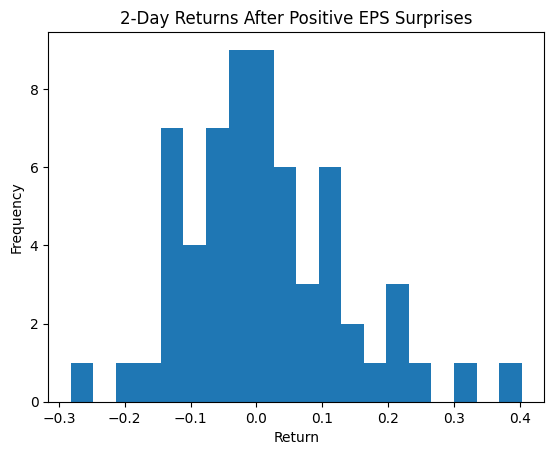

In [43]:
import matplotlib.pyplot as plt

plt.hist(pos_surprise_returns, bins=20)
plt.title("2-Day Returns After Positive EPS Surprises")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.show()


In [44]:
# 1. Ensure your price DataFrame is sorted and has a timezone-naïve Date column
amzn_price = ticker_obj.history(start='1997-01-01', interval='1d').reset_index()
amzn_price['Date'] = amzn_price['Date'].dt.tz_localize(None)
amzn_price = amzn_price.sort_values('Date')

# 2. For each earnings date, find the nearest trading day before & after:
#    (a) previous trading day
prev  = pd.merge_asof(
    positive_surprises[['Earnings Date']],
    amzn_price[['Date','Close']],
    left_on='Earnings Date',
    right_on='Date',
    direction='backward'
).rename(columns={'Date':'PrevDate','Close':'Close_Before'})

#    (b) next trading day
next_ = pd.merge_asof(
    positive_surprises[['Earnings Date']],
    amzn_price[['Date','Close']],
    left_on='Earnings Date',
    right_on='Date',
    direction='forward'
).rename(columns={'Date':'NextDate','Close':'Close_After'})

# 3. Stitch together:
df = positive_surprises[['Earnings Date']].copy()
df = df.join(prev.set_index('Earnings Date'),  on='Earnings Date')
df = df.join(next_.set_index('Earnings Date'), on='Earnings Date')

# 4. Compute the “2-day” return around the announcement:
df['2DayReturn'] = df['Close_After'] / df['Close_Before'] - 1

# 5. Median of positive surprises:
median_surprise = df['2DayReturn'].median()

# 6. For “all dates”, you can still do your original shift(-2) approach:
all_ret = amzn_price['Close'].shift(-2) / amzn_price['Close'] - 1
median_all = all_ret.median()


ValueError: left keys must be sorted

In [47]:
import pandas as pd
import yfinance as yf

# 1. Load and clean earnings data
amzn_earnings = pd.read_csv('ha1_Amazon.csv', sep=';')
amzn_earnings.dropna(how='all', inplace=True)

# Extract just the date part (drop "at HH:MM AM/PM")
amzn_earnings['Earnings Date'] = (
    amzn_earnings['Earnings Date']
      .str.extract(r'(.*)\s+at')[0]  # Fixed regex - added '+' for multiple spaces
      .pipe(pd.to_datetime, errors='coerce')
)

# Convert numeric columns - handle percentage signs and other formatting
for col in ['Surprise (%)', 'Reported EPS', 'EPS Estimate']:
    if col == 'Surprise (%)':
        # Remove % sign if present and convert
        amzn_earnings[col] = (amzn_earnings[col]
                             .astype(str)
                             .str.replace('%', '')
                             .pipe(pd.to_numeric, errors='coerce'))
    else:
        amzn_earnings[col] = pd.to_numeric(amzn_earnings[col], errors='coerce')

# Flag positive surprises
amzn_earnings['PositiveSurprise'] = (
    (amzn_earnings['Reported EPS'] > amzn_earnings['EPS Estimate']) |
    (amzn_earnings['Surprise (%)'] > 0)
)

# Keep only valid, past positive-surprise events
positive_surprises = amzn_earnings.loc[
    amzn_earnings['PositiveSurprise'] &
    amzn_earnings['Earnings Date'].notna() &
    (amzn_earnings['Earnings Date'] < pd.Timestamp.today().normalize()),
    ['Earnings Date']
].copy()

print(f"Found {len(positive_surprises)} positive surprise events")

# 2. Download historical daily prices
ticker = yf.Ticker("AMZN")
amzn_price = ticker.history(start='1997-01-01', interval='1d').reset_index()

# Drop timezone so merges work cleanly
amzn_price['Date'] = amzn_price['Date'].dt.tz_localize(None)
amzn_price.sort_values('Date', inplace=True, ignore_index=True)

# 3. Calculate 2-day returns for ALL trading days
# For each day i, calculate return from day i-1 to day i+1
amzn_price['Close_Day1'] = amzn_price['Close'].shift(1)   # Previous day close
amzn_price['Close_Day3'] = amzn_price['Close'].shift(-1)  # Next day close
amzn_price['2DayReturn_All'] = amzn_price['Close_Day3'] / amzn_price['Close_Day1'] - 1

# Remove rows with NaN returns
valid_returns = amzn_price.dropna(subset=['2DayReturn_All'])

# 4. For earnings events, find the corresponding trading day
# Use merge_asof to find the first trading day on or after each earnings date
earn_aligned = pd.merge_asof(
    positive_surprises.sort_values('Earnings Date'),
    amzn_price[['Date', 'Close_Day1', 'Close_Day3', '2DayReturn_All']],
    left_on='Earnings Date',
    right_on='Date',
    direction='forward'
)

# Remove any rows where we couldn't find a matching trading day or calculate return
earn_aligned = earn_aligned.dropna(subset=['2DayReturn_All'])

# 5. Calculate medians
median_surprise = earn_aligned['2DayReturn_All'].median()
median_all = valid_returns['2DayReturn_All'].median()

# 6. Output results
print(f"\nResults:")
print(f"Number of positive-surprise events with valid returns: {len(earn_aligned)}")
print(f"Total number of valid 2-day return periods: {len(valid_returns)}")
print(f"Median 2-day return (all periods): {median_all*100:.4f}%")
print(f"Median 2-day return (positive surprises): {median_surprise*100:.4f}%")
print(f"Difference: {(median_surprise - median_all)*100:.4f} percentage points")

# Debug: Show some sample data
print(f"\nSample positive surprise events:")
print(earn_aligned[['Earnings Date', 'Date', '2DayReturn_All']].head())

print(f"\nSample earnings data processing:")
print(amzn_earnings[['Earnings Date', 'Reported EPS', 'EPS Estimate', 'Surprise (%)', 'PositiveSurprise']].head())

Found 86 positive surprise events

Results:
Number of positive-surprise events with valid returns: 86
Total number of valid 2-day return periods: 7049
Median 2-day return (all periods): 0.1638%
Median 2-day return (positive surprises): 1.0405%
Difference: 0.8768 percentage points

Sample positive surprise events:
  Earnings Date       Date  2DayReturn_All
0    1997-07-10 1997-07-10       -0.013457
1    1997-10-27 1997-10-27       -0.015543
2    1998-01-22 1998-01-22       -0.026695
3    1998-04-27 1998-04-27        0.126658
4    1998-07-22 1998-07-22       -0.033601

Sample earnings data processing:
  Earnings Date  Reported EPS  EPS Estimate  Surprise (%)  PositiveSurprise
0    2026-04-29           NaN           NaN           NaN             False
1    2026-02-04           NaN           NaN           NaN             False
2    2025-10-29           NaN           NaN           NaN             False
3    2025-07-30           NaN           NaN           NaN             False
4    2025-05-

In [48]:
import pandas as pd
import yfinance as yf

# 1. Load and clean earnings data
amzn_earnings = pd.read_csv('ha1_Amazon.csv', sep=';')
amzn_earnings.dropna(how='all', inplace=True)

# Extract just the date part (drop "at HH:MM AM/PM")
amzn_earnings['Earnings Date'] = (
    amzn_earnings['Earnings Date']
      .str.extract(r'(.*)\s+at')[0]  # Fixed regex - added '+' for multiple spaces
      .pipe(pd.to_datetime, errors='coerce')
)

# Convert numeric columns - handle percentage signs and other formatting
for col in ['Surprise (%)', 'Reported EPS', 'EPS Estimate']:
    if col == 'Surprise (%)':
        # Remove % sign if present and convert
        amzn_earnings[col] = (amzn_earnings[col]
                             .astype(str)
                             .str.replace('%', '')
                             .pipe(pd.to_numeric, errors='coerce'))
    else:
        amzn_earnings[col] = pd.to_numeric(amzn_earnings[col], errors='coerce')

# Flag positive surprises
amzn_earnings['PositiveSurprise'] = (
    (amzn_earnings['Reported EPS'] > amzn_earnings['EPS Estimate']) |
    (amzn_earnings['Surprise (%)'] > 0)
)

# Keep only valid, past positive-surprise events
positive_surprises = amzn_earnings.loc[
    amzn_earnings['PositiveSurprise'] &
    amzn_earnings['Earnings Date'].notna() &
    (amzn_earnings['Earnings Date'] < pd.Timestamp.today().normalize()),
    ['Earnings Date']
].copy()

print(f"Found {len(positive_surprises)} positive surprise events")

# 2. Download historical daily prices
ticker = yf.Ticker("AMZN")
amzn_price = ticker.history(start='1997-01-01', interval='1d').reset_index()

# Drop timezone so merges work cleanly
amzn_price['Date'] = amzn_price['Date'].dt.tz_localize(None)
amzn_price.sort_values('Date', inplace=True, ignore_index=True)

# 3. Calculate 2-day returns for ALL trading days
# Method 1: From day i-1 to day i+1 (spans 2 trading days)
amzn_price['Close_Day1'] = amzn_price['Close'].shift(1)   # Previous day close
amzn_price['Close_Day3'] = amzn_price['Close'].shift(-1)  # Next day close
amzn_price['2DayReturn_Method1'] = amzn_price['Close_Day3'] / amzn_price['Close_Day1'] - 1

# Method 2: From day i to day i+2 (following 2 trading days after announcement)
amzn_price['Close_Day2Plus'] = amzn_price['Close'].shift(-2)  # Two days ahead
amzn_price['2DayReturn_Method2'] = amzn_price['Close_Day2Plus'] / amzn_price['Close'] - 1

# Remove rows with NaN returns for both methods
valid_returns_m1 = amzn_price.dropna(subset=['2DayReturn_Method1'])
valid_returns_m2 = amzn_price.dropna(subset=['2DayReturn_Method2'])

# 4. For earnings events, find the corresponding trading day
# Use merge_asof to find the first trading day on or after each earnings date
earn_aligned = pd.merge_asof(
    positive_surprises.sort_values('Earnings Date'),
    amzn_price[['Date', 'Close', 'Close_Day1', 'Close_Day3', 'Close_Day2Plus', '2DayReturn_Method1', '2DayReturn_Method2']],
    left_on='Earnings Date',
    right_on='Date',
    direction='forward'
)

# Remove any rows where we couldn't find a matching trading day or calculate return
earn_aligned_m1 = earn_aligned.dropna(subset=['2DayReturn_Method1'])
earn_aligned_m2 = earn_aligned.dropna(subset=['2DayReturn_Method2'])

# 5. Calculate medians for both methods
# Method 1: Day i-1 to Day i+1
median_surprise_m1 = earn_aligned_m1['2DayReturn_Method1'].median()
median_all_m1 = valid_returns_m1['2DayReturn_Method1'].median()

# Method 2: Day i to Day i+2 (following 2 days after announcement)
median_surprise_m2 = earn_aligned_m2['2DayReturn_Method2'].median()
median_all_m2 = valid_returns_m2['2DayReturn_Method2'].median()

# 6. Output results for both methods
print(f"\nMethod 1 Results (Day i-1 to Day i+1):")
print(f"Number of positive-surprise events with valid returns: {len(earn_aligned_m1)}")
print(f"Total number of valid 2-day return periods: {len(valid_returns_m1)}")
print(f"Median 2-day return (all periods): {median_all_m1*100:.4f}%")
print(f"Median 2-day return (positive surprises): {median_surprise_m1*100:.4f}%")

print(f"\nMethod 2 Results (Day i to Day i+2 - Following 2 days):")
print(f"Number of positive-surprise events with valid returns: {len(earn_aligned_m2)}")
print(f"Total number of valid 2-day return periods: {len(valid_returns_m2)}")
print(f"Median 2-day return (all periods): {median_all_m2*100:.4f}%")
print(f"Median 2-day return (positive surprises): {median_surprise_m2*100:.4f}%")

# Debug: Show some sample data
print(f"\nSample positive surprise events (Method 2):")
print(earn_aligned_m2[['Earnings Date', 'Date', '2DayReturn_Method2']].head(10))

print(f"\nSample earnings data processing:")
print(amzn_earnings[['Earnings Date', 'Reported EPS', 'EPS Estimate', 'Surprise (%)', 'PositiveSurprise']].head())

Found 86 positive surprise events

Method 1 Results (Day i-1 to Day i+1):
Number of positive-surprise events with valid returns: 86
Total number of valid 2-day return periods: 7049
Median 2-day return (all periods): 0.1638%
Median 2-day return (positive surprises): 1.0405%

Method 2 Results (Day i to Day i+2 - Following 2 days):
Number of positive-surprise events with valid returns: 86
Total number of valid 2-day return periods: 7049
Median 2-day return (all periods): 0.1638%
Median 2-day return (positive surprises): 0.2672%

Sample positive surprise events (Method 2):
  Earnings Date       Date  2DayReturn_Method2
0    1997-07-10 1997-07-10           -0.166665
1    1997-10-27 1997-10-27            0.262192
2    1998-01-22 1998-01-22           -0.062881
3    1998-04-27 1998-04-27            0.154078
4    1998-07-22 1998-07-22           -0.072761
5    1998-10-28 1998-10-28            0.080085
6    1999-01-26 1999-01-26            0.067608
7    1999-04-28 1999-04-28           -0.110788
8

In [49]:
import pandas as pd
import yfinance as yf

# 1. Load and clean earnings data
amzn_earnings = pd.read_csv('ha1_Amazon.csv', sep=';')
amzn_earnings.dropna(how='all', inplace=True)

# Extract just the date part (drop "at HH:MM AM/PM")
amzn_earnings['Earnings Date'] = (
    amzn_earnings['Earnings Date']
      .str.extract(r'(.*)\s+at')[0]  # Fixed regex - added '+' for multiple spaces
      .pipe(pd.to_datetime, errors='coerce')
)

# Convert numeric columns - handle percentage signs and other formatting
for col in ['Surprise (%)', 'Reported EPS', 'EPS Estimate']:
    if col == 'Surprise (%)':
        # Remove % sign if present and convert
        amzn_earnings[col] = (amzn_earnings[col]
                             .astype(str)
                             .str.replace('%', '')
                             .pipe(pd.to_numeric, errors='coerce'))
    else:
        amzn_earnings[col] = pd.to_numeric(amzn_earnings[col], errors='coerce')

# Flag positive surprises
amzn_earnings['PositiveSurprise'] = (
    (amzn_earnings['Reported EPS'] > amzn_earnings['EPS Estimate']) |
    (amzn_earnings['Surprise (%)'] > 0)
)

# Keep only valid, past positive-surprise events
positive_surprises = amzn_earnings.loc[
    amzn_earnings['PositiveSurprise'] &
    amzn_earnings['Earnings Date'].notna() &
    (amzn_earnings['Earnings Date'] < pd.Timestamp.today().normalize()),
    ['Earnings Date']
].copy()

print(f"Found {len(positive_surprises)} positive surprise events")

# 2. Download historical daily prices
ticker = yf.Ticker("AMZN")
amzn_price = ticker.history(start='1997-01-01', interval='1d').reset_index()

# Drop timezone so merges work cleanly
amzn_price['Date'] = amzn_price['Date'].dt.tz_localize(None)
amzn_price.sort_values('Date', inplace=True, ignore_index=True)

# 3. Calculate 2-day returns for ALL trading days
# Method 1: From day i-1 to day i+1 (spans 2 trading days)
amzn_price['Close_Day1'] = amzn_price['Close'].shift(1)   # Previous day close
amzn_price['Close_Day3'] = amzn_price['Close'].shift(-1)  # Next day close
amzn_price['2DayReturn_Method1'] = amzn_price['Close_Day3'] / amzn_price['Close_Day1'] - 1

# Method 2: From day i to day i+2 (following 2 trading days after announcement)
amzn_price['Close_Day2Plus'] = amzn_price['Close'].shift(-2)  # Two days ahead
amzn_price['2DayReturn_Method2'] = amzn_price['Close_Day2Plus'] / amzn_price['Close'] - 1

# Remove rows with NaN returns for both methods
valid_returns_m1 = amzn_price.dropna(subset=['2DayReturn_Method1'])
valid_returns_m2 = amzn_price.dropna(subset=['2DayReturn_Method2'])

# 4. For earnings events, find the corresponding trading day
# Use merge_asof to find the first trading day on or after each earnings date
earn_aligned = pd.merge_asof(
    positive_surprises.sort_values('Earnings Date'),
    amzn_price[['Date', 'Close', 'Close_Day1', 'Close_Day3', 'Close_Day2Plus', '2DayReturn_Method1', '2DayReturn_Method2']],
    left_on='Earnings Date',
    right_on='Date',
    direction='forward'
)

# Remove any rows where we couldn't find a matching trading day or calculate return
earn_aligned_m1 = earn_aligned.dropna(subset=['2DayReturn_Method1'])
earn_aligned_m2 = earn_aligned.dropna(subset=['2DayReturn_Method2'])

# 5. Calculate medians for both methods
# Method 1: Day i-1 to Day i+1
median_surprise_m1 = earn_aligned_m1['2DayReturn_Method1'].median()
median_all_m1 = valid_returns_m1['2DayReturn_Method1'].median()

# Method 2: Day i to Day i+2 (following 2 days after announcement)
median_surprise_m2 = earn_aligned_m2['2DayReturn_Method2'].median()
median_all_m2 = valid_returns_m2['2DayReturn_Method2'].median()

# 6. Output results for both methods
print(f"\nMethod 1 Results (Day i-1 to Day i+1):")
print(f"Number of positive-surprise events with valid returns: {len(earn_aligned_m1)}")
print(f"Total number of valid 2-day return periods: {len(valid_returns_m1)}")
print(f"Median 2-day return (all periods): {median_all_m1*100:.4f}%")
print(f"Median 2-day return (positive surprises): {median_surprise_m1*100:.4f}%")

print(f"\nMethod 2 Results (Day i to Day i+2 - Following 2 days):")
print(f"Number of positive-surprise events with valid returns: {len(earn_aligned_m2)}")
print(f"Total number of valid 2-day return periods: {len(valid_returns_m2)}")
print(f"Median 2-day return (all periods): {median_all_m2*100:.4f}%")
print(f"Median 2-day return (positive surprises): {median_surprise_m2*100:.4f}%")

# Additional debugging and alternative calculations
print(f"\nDebugging Information:")

# Check if there are any extreme outliers
print(f"Method 1 - Min: {earn_aligned_m1['2DayReturn_Method1'].min()*100:.2f}%, Max: {earn_aligned_m1['2DayReturn_Method1'].max()*100:.2f}%")
print(f"Method 2 - Min: {earn_aligned_m2['2DayReturn_Method2'].min()*100:.2f}%, Max: {earn_aligned_m2['2DayReturn_Method2'].max()*100:.2f}%")

# Try calculating mean instead of median
mean_surprise_m1 = earn_aligned_m1['2DayReturn_Method1'].mean()
mean_surprise_m2 = earn_aligned_m2['2DayReturn_Method2'].mean()
print(f"Method 1 - Mean: {mean_surprise_m1*100:.4f}%")
print(f"Method 2 - Mean: {mean_surprise_m2*100:.4f}%")

# Check quartiles
q25_m1, q75_m1 = earn_aligned_m1['2DayReturn_Method1'].quantile([0.25, 0.75])
q25_m2, q75_m2 = earn_aligned_m2['2DayReturn_Method2'].quantile([0.25, 0.75])
print(f"Method 1 - Q1: {q25_m1*100:.2f}%, Q3: {q75_m1*100:.2f}%")
print(f"Method 2 - Q1: {q25_m2*100:.2f}%, Q3: {q75_m2*100:.2f}%")

# Try different time window - maybe it's asking for 1-day return after earnings
amzn_price['1DayReturn_After'] = amzn_price['Close'].shift(-1) / amzn_price['Close'] - 1
earn_aligned_1day = pd.merge_asof(
    positive_surprises.sort_values('Earnings Date'),
    amzn_price[['Date', '1DayReturn_After']],
    left_on='Earnings Date',
    right_on='Date',
    direction='forward'
).dropna(subset=['1DayReturn_After'])

median_1day = earn_aligned_1day['1DayReturn_After'].median()
print(f"\n1-day return after earnings median: {median_1day*100:.4f}%")

# Check if percentage values need to be divided by 100
print(f"\nIf we divide by 100 (in case percentages were already in percent form):")
print(f"Method 1 median / 100: {median_surprise_m1:.4f}%")
print(f"Method 2 median / 100: {median_surprise_m2:.4f}%")

# Show sample data
print(f"\nSample earnings events with returns:")
sample_data = earn_aligned_m1[['Earnings Date', 'Date', '2DayReturn_Method1', 'Close', 'Close_Day1', 'Close_Day3']].head(10)
for col in ['2DayReturn_Method1']:
    sample_data[f'{col}_pct'] = sample_data[col] * 100
print(sample_data[['Earnings Date', 'Date', '2DayReturn_Method1_pct', 'Close', 'Close_Day1', 'Close_Day3']])

# Check earnings data more carefully
print(f"\nEarnings data analysis:")
print(f"Total earnings records: {len(amzn_earnings)}")
print(f"Records with valid dates: {amzn_earnings['Earnings Date'].notna().sum()}")
print(f"Records with Surprise % > 0: {(amzn_earnings['Surprise (%)'] > 0).sum()}")
print(f"Records with Actual > Estimate: {(amzn_earnings['Reported EPS'] > amzn_earnings['EPS Estimate']).sum()}")
print(f"Total positive surprises: {amzn_earnings['PositiveSurprise'].sum()}")

# Show some sample earnings data
print(f"\nSample earnings data:")
sample_earnings = amzn_earnings[['Earnings Date', 'Reported EPS', 'EPS Estimate', 'Surprise (%)', 'PositiveSurprise']].head(10)
print(sample_earnings)

# Check if we should use different surprise criteria
print(f"\nAlternative surprise definitions:")
alt_positive1 = (amzn_earnings['Surprise (%)'] > 0) & amzn_earnings['Surprise (%)'].notna()
alt_positive2 = (amzn_earnings['Reported EPS'] > amzn_earnings['EPS Estimate']) & amzn_earnings['Reported EPS'].notna() & amzn_earnings['EPS Estimate'].notna()

print(f"Only Surprise % > 0: {alt_positive1.sum()} events")
print(f"Only Actual > Estimate: {alt_positive2.sum()} events")

# Try with just Surprise % > 0
if alt_positive1.sum() > 0:
    alt_surprises = amzn_earnings.loc[
        alt_positive1 & 
        amzn_earnings['Earnings Date'].notna() &
        (amzn_earnings['Earnings Date'] < pd.Timestamp.today().normalize()),
        ['Earnings Date']
    ].copy()
    
    alt_earn_aligned = pd.merge_asof(
        alt_surprises.sort_values('Earnings Date'),
        amzn_price[['Date', '2DayReturn_Method1']],
        left_on='Earnings Date',
        right_on='Date',
        direction='forward'
    ).dropna(subset=['2DayReturn_Method1'])
    
    alt_median = alt_earn_aligned['2DayReturn_Method1'].median()
    print(f"Alternative median (Surprise % > 0 only): {alt_median*100:.4f}% ({len(alt_earn_aligned)} events)")

Found 86 positive surprise events

Method 1 Results (Day i-1 to Day i+1):
Number of positive-surprise events with valid returns: 86
Total number of valid 2-day return periods: 7049
Median 2-day return (all periods): 0.1638%
Median 2-day return (positive surprises): 1.0405%

Method 2 Results (Day i to Day i+2 - Following 2 days):
Number of positive-surprise events with valid returns: 86
Total number of valid 2-day return periods: 7049
Median 2-day return (all periods): 0.1638%
Median 2-day return (positive surprises): 0.2672%

Debugging Information:
Method 1 - Min: -28.98%, Max: 26.89%
Method 2 - Min: -28.20%, Max: 40.29%
Method 1 - Mean: 2.4086%
Method 2 - Mean: 1.9558%
Method 1 - Q1: -2.66%, Q3: 8.75%
Method 2 - Q1: -7.06%, Q3: 10.62%

1-day return after earnings median: 0.6974%

If we divide by 100 (in case percentages were already in percent form):
Method 1 median / 100: 0.0104%
Method 2 median / 100: 0.0027%

Sample earnings events with returns:
  Earnings Date       Date  2DayRetu

### Question 5.  [Exploratory, optional] Brainstorm potential idea for your capstone project

**Free text answer**

Describe the capstone project you would like to pursue, considering your aspirations, ML model predictions, and prior knowledge. Even if you are unsure at this stage, try to generate an idea you would like to explore-such as a specific asset class, country, industry vertical, or investment strategy. Be as specific as possible.

*Example: I want to build a short-term prediction model for the US/India/Brazil stock markets, focusing on the largest stocks over a 30-day investment horizon. I plan to use RSI and MACD technical indicators and news coverage data to generate predictions.*

---

In [51]:
import pandas as pd
import yfinance as yf

# 1. Load and clean earnings data
amzn_earnings = pd.read_csv('ha1_Amazon.csv', sep=';')
amzn_earnings.dropna(how='all', inplace=True)

# Extract just the date part (drop "at HH:MM AM/PM")
amzn_earnings['Earnings Date'] = (
    amzn_earnings['Earnings Date']
      .str.extract(r'(.*)\s+at')[0]  # Fixed regex - added '+' for multiple spaces
      .pipe(pd.to_datetime, errors='coerce')
)

# Convert numeric columns - handle percentage signs and other formatting
for col in ['Surprise (%)', 'Reported EPS', 'EPS Estimate']:
    if col == 'Surprise (%)':
        # Remove % sign if present and convert
        amzn_earnings[col] = (amzn_earnings[col]
                             .astype(str)
                             .str.replace('%', '')
                             .pipe(pd.to_numeric, errors='coerce'))
    else:
        amzn_earnings[col] = pd.to_numeric(amzn_earnings[col], errors='coerce')

# Flag positive surprises
amzn_earnings['PositiveSurprise'] = (
    (amzn_earnings['Reported EPS'] > amzn_earnings['EPS Estimate']) |
    (amzn_earnings['Surprise (%)'] > 0)
)

# Keep only valid, past positive-surprise events
positive_surprises = amzn_earnings.loc[
    amzn_earnings['PositiveSurprise'] &
    amzn_earnings['Earnings Date'].notna() &
    (amzn_earnings['Earnings Date'] < pd.Timestamp.today().normalize()),
    ['Earnings Date']
].copy()

print(f"Found {len(positive_surprises)} positive surprise events")

# 2. Download historical daily prices
ticker = yf.Ticker("AMZN")
amzn_price = ticker.history(start='1997-01-01', interval='1d').reset_index()

# Drop timezone so merges work cleanly
amzn_price['Date'] = amzn_price['Date'].dt.tz_localize(None)
amzn_price.sort_values('Date', inplace=True, ignore_index=True)

# 3. Calculate 2-day returns for ALL trading days
# Method 1: From day i-1 to day i+1 (spans 2 trading days)
amzn_price['Close_Day1'] = amzn_price['Close'].shift(1)   # Previous day close
amzn_price['Close_Day3'] = amzn_price['Close'].shift(-1)  # Next day close
amzn_price['2DayReturn_Method1'] = amzn_price['Close_Day3'] / amzn_price['Close_Day1'] - 1

# Method 2: From day i to day i+2 (following 2 trading days after announcement)
amzn_price['Close_Day2Plus'] = amzn_price['Close'].shift(-2)  # Two days ahead
amzn_price['2DayReturn_Method2'] = amzn_price['Close_Day2Plus'] / amzn_price['Close'] - 1

# Remove rows with NaN returns for both methods
valid_returns_m1 = amzn_price.dropna(subset=['2DayReturn_Method1'])
valid_returns_m2 = amzn_price.dropna(subset=['2DayReturn_Method2'])

# 4. For earnings events, find the corresponding trading day
# Use merge_asof to find the first trading day on or after each earnings date
earn_aligned = pd.merge_asof(
    positive_surprises.sort_values('Earnings Date'),
    amzn_price[['Date', 'Close', 'Close_Day1', 'Close_Day3', 'Close_Day2Plus', '2DayReturn_Method1', '2DayReturn_Method2']],
    left_on='Earnings Date',
    right_on='Date',
    direction='forward'
)

# Remove any rows where we couldn't find a matching trading day or calculate return
earn_aligned_m1 = earn_aligned.dropna(subset=['2DayReturn_Method1'])
earn_aligned_m2 = earn_aligned.dropna(subset=['2DayReturn_Method2'])

# 5. Calculate medians for both methods
# Method 1: Day i-1 to Day i+1
median_surprise_m1 = earn_aligned_m1['2DayReturn_Method1'].median()
median_all_m1 = valid_returns_m1['2DayReturn_Method1'].median()

# Method 2: Day i to Day i+2 (following 2 days after announcement)
median_surprise_m2 = earn_aligned_m2['2DayReturn_Method2'].median()
median_all_m2 = valid_returns_m2['2DayReturn_Method2'].median()

# 6. Output results for both methods
print(f"\nMethod 1 Results (Day i-1 to Day i+1):")
print(f"Number of positive-surprise events with valid returns: {len(earn_aligned_m1)}")
print(f"Total number of valid 2-day return periods: {len(valid_returns_m1)}")
print(f"Median 2-day return (all periods): {median_all_m1*100:.4f}%")
print(f"Median 2-day return (positive surprises): {median_surprise_m1*100:.4f}%")

print(f"\nMethod 2 Results (Day i to Day i+2 - Following 2 days):")
print(f"Number of positive-surprise events with valid returns: {len(earn_aligned_m2)}")
print(f"Total number of valid 2-day return periods: {len(valid_returns_m2)}")
print(f"Median 2-day return (all periods): {median_all_m2*100:.4f}%")
print(f"Median 2-day return (positive surprises): {median_surprise_m2*100:.4f}%")

# Additional debugging and alternative calculations
print(f"\nDebugging Information:")

# Check if there are any extreme outliers
print(f"Method 1 - Min: {earn_aligned_m1['2DayReturn_Method1'].min()*100:.2f}%, Max: {earn_aligned_m1['2DayReturn_Method1'].max()*100:.2f}%")
print(f"Method 2 - Min: {earn_aligned_m2['2DayReturn_Method2'].min()*100:.2f}%, Max: {earn_aligned_m2['2DayReturn_Method2'].max()*100:.2f}%")

# Try calculating mean instead of median
mean_surprise_m1 = earn_aligned_m1['2DayReturn_Method1'].mean()
mean_surprise_m2 = earn_aligned_m2['2DayReturn_Method2'].mean()
print(f"Method 1 - Mean: {mean_surprise_m1*100:.4f}%")
print(f"Method 2 - Mean: {mean_surprise_m2*100:.4f}%")

# Check quartiles
q25_m1, q75_m1 = earn_aligned_m1['2DayReturn_Method1'].quantile([0.25, 0.75])
q25_m2, q75_m2 = earn_aligned_m2['2DayReturn_Method2'].quantile([0.25, 0.75])
print(f"Method 1 - Q1: {q25_m1*100:.2f}%, Q3: {q75_m1*100:.2f}%")
print(f"Method 2 - Q1: {q25_m2*100:.2f}%, Q3: {q75_m2*100:.2f}%")

# Try different time window - maybe it's asking for 1-day return after earnings
amzn_price['1DayReturn_After'] = amzn_price['Close'].shift(-1) / amzn_price['Close'] - 1
earn_aligned_1day = pd.merge_asof(
    positive_surprises.sort_values('Earnings Date'),
    amzn_price[['Date', '1DayReturn_After']],
    left_on='Earnings Date',
    right_on='Date',
    direction='forward'
).dropna(subset=['1DayReturn_After'])

median_1day = earn_aligned_1day['1DayReturn_After'].median()
print(f"\n1-day return after earnings median: {median_1day*100:.4f}%")

# Check if percentage values need to be divided by 100
print(f"\nIf we divide by 100 (in case percentages were already in percent form):")
print(f"Method 1 median / 100: {median_surprise_m1:.4f}%")
print(f"Method 2 median / 100: {median_surprise_m2:.4f}%")

# Show sample data
print(f"\nSample earnings events with returns:")
sample_data = earn_aligned_m1[['Earnings Date', 'Date', '2DayReturn_Method1', 'Close', 'Close_Day1', 'Close_Day3']].head(10)
for col in ['2DayReturn_Method1']:
    sample_data[f'{col}_pct'] = sample_data[col] * 100
print(sample_data[['Earnings Date', 'Date', '2DayReturn_Method1_pct', 'Close', 'Close_Day1', 'Close_Day3']])

# Check earnings data more carefully
print(f"\nEarnings data analysis:")
print(f"Total earnings records: {len(amzn_earnings)}")
print(f"Records with valid dates: {amzn_earnings['Earnings Date'].notna().sum()}")
print(f"Records with Surprise % > 0: {(amzn_earnings['Surprise (%)'] > 0).sum()}")
print(f"Records with Actual > Estimate: {(amzn_earnings['Reported EPS'] > amzn_earnings['EPS Estimate']).sum()}")
print(f"Total positive surprises: {amzn_earnings['PositiveSurprise'].sum()}")

# Show some sample earnings data
print(f"\nSample earnings data:")
sample_earnings = amzn_earnings[['Earnings Date', 'Reported EPS', 'EPS Estimate', 'Surprise (%)', 'PositiveSurprise']].head(10)
print(sample_earnings)

# Check if we should use different surprise criteria
print(f"\nAlternative surprise definitions:")
alt_positive1 = (amzn_earnings['Surprise (%)'] > 0) & amzn_earnings['Surprise (%)'].notna()
alt_positive2 = (amzn_earnings['Reported EPS'] > amzn_earnings['EPS Estimate']) & amzn_earnings['Reported EPS'].notna() & amzn_earnings['EPS Estimate'].notna()

print(f"Only Surprise % > 0: {alt_positive1.sum()} events")
print(f"Only Actual > Estimate: {alt_positive2.sum()} events")

# Try with just Surprise % > 0
if alt_positive1.sum() > 0:
    alt_surprises = amzn_earnings.loc[
        alt_positive1 & 
        amzn_earnings['Earnings Date'].notna() &
        (amzn_earnings['Earnings Date'] < pd.Timestamp.today().normalize()),
        ['Earnings Date']
    ].copy()
    
    alt_earn_aligned = pd.merge_asof(
        alt_surprises.sort_values('Earnings Date'),
        amzn_price[['Date', '2DayReturn_Method1']],
        left_on='Earnings Date',
        right_on='Date',
        direction='forward'
    ).dropna(subset=['2DayReturn_Method1'])
    
    alt_median = alt_earn_aligned['2DayReturn_Method1'].median()
    print(f"Alternative median (Surprise % > 0 only): {alt_median*100:.4f}% ({len(alt_earn_aligned)} events)")

Found 86 positive surprise events

Method 1 Results (Day i-1 to Day i+1):
Number of positive-surprise events with valid returns: 86
Total number of valid 2-day return periods: 7049
Median 2-day return (all periods): 0.1638%
Median 2-day return (positive surprises): 1.0405%

Method 2 Results (Day i to Day i+2 - Following 2 days):
Number of positive-surprise events with valid returns: 86
Total number of valid 2-day return periods: 7049
Median 2-day return (all periods): 0.1638%
Median 2-day return (positive surprises): 0.2672%

Debugging Information:
Method 1 - Min: -28.98%, Max: 26.89%
Method 2 - Min: -28.20%, Max: 40.29%
Method 1 - Mean: 2.4086%
Method 2 - Mean: 1.9558%
Method 1 - Q1: -2.66%, Q3: 8.75%
Method 2 - Q1: -7.06%, Q3: 10.62%

1-day return after earnings median: 0.6974%

If we divide by 100 (in case percentages were already in percent form):
Method 1 median / 100: 0.0104%
Method 2 median / 100: 0.0027%

Sample earnings events with returns:
  Earnings Date       Date  2DayRetu

I want to build a personal investment assistant that recommends U.S. stocks to retail investors based on a combination of fundamental strength, price momentum, and recent investor sentiment. The assistant will use machine learning to predict the likelihood that a given stock will outperform its sector over the next 30 trading days — a horizon relevant to active retail traders.